# Data Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_style("white")
CB_color_cycle = ['#6cc0e5', '#fbc93d', '#fb4f4f',
                  '#F0E442', '#0072B2', '#D55E00',
                  '#999999', '#e41a1c', '#dede00']

df = pd.read_csv('/Users/jennytran/Documents/GitHub/smoc-project/data/SMOCDemoGCA.xlsx - SMOCDemoGCA.csv')

df = df[['person_id','Day','chat_room_id','z.participation',
 'z.social.impact',
 'z.overall.responsivity',
 'z.internal.cohesion',
 'z.newness',
 'z.comm.density',
 'SixCluster', 'Sex']]

df = df.dropna().reset_index(drop=True)

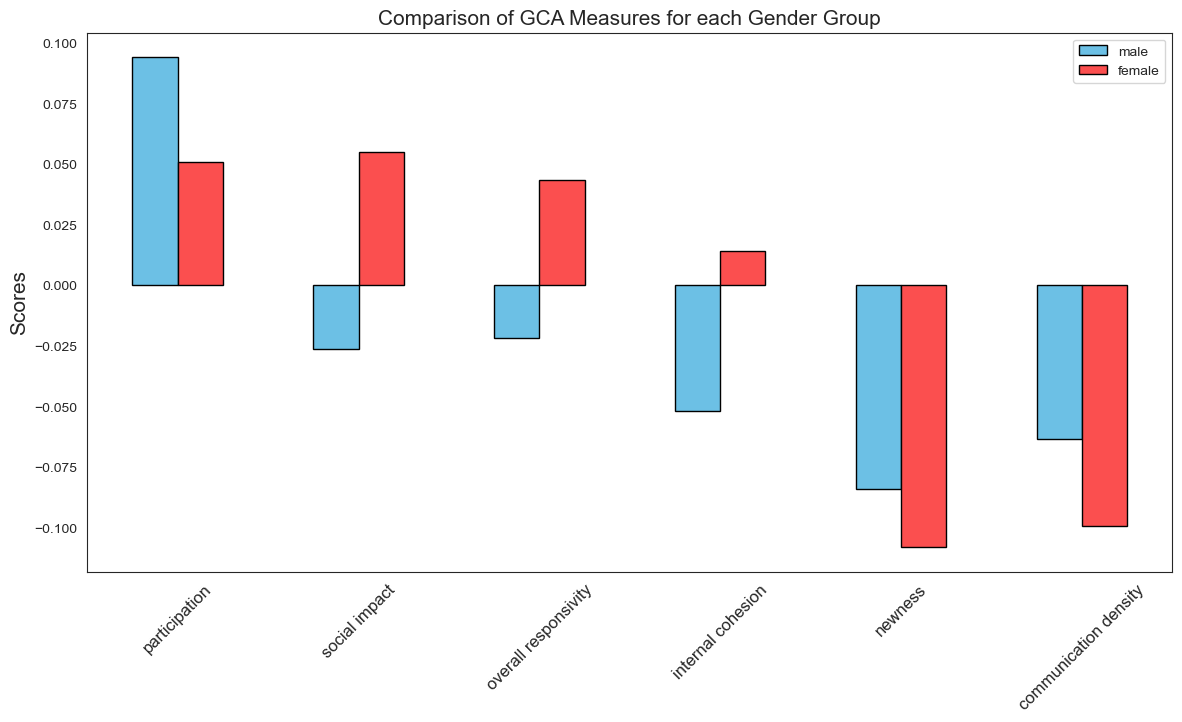

In [2]:
cols = ["participation", "social impact", "overall responsivity", "internal cohesion", "newness", "communication density"]
num = [1.0, 2.0]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
    y = df.loc[df['Sex'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "participation":z_par,
    "social impact":z_soc,
    "overall responsivity":z_overesp,
    "internal cohesion":z_internal,
    "newness":z_new,
    "communication density":z_dens

    }, 
    index=['male', 'female']
)

plotdata = plotdata + .10
plotdata = plotdata.transpose()

code = ['#6cc0e5', '#fb4f4f']
plotdata.plot(kind="bar", figsize=(14, 7), color = code, edgecolor = 'black')
plt.title("Comparison of GCA Measures for each Gender Group", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.savefig('/Users/jennytran/Documents/GitHub/smoc-project/outputs/gca_gender_all.png')

## T-Test for whole dataset

In [3]:
df_fem = df.loc[df['Sex'] == 2.0].reset_index(drop = True)
df_male = df.loc[df['Sex'] == 1.0].reset_index(drop = True)

In [4]:
t_test_all = []
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.participation'], df_male['z.participation'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.social.impact'], df_male['z.social.impact'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.overall.responsivity'], df_male['z.overall.responsivity'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.internal.cohesion'], df_male['z.internal.cohesion'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.newness'], df_male['z.newness'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.comm.density'], df_male['z.comm.density'])))
df_ttest_all = pd.DataFrame(t_test_all, columns = ['f-statistic', 'p-value'])
df_ttest_all.insert(loc = 0, column = 'GCA dimensions', value = cols)
df_ttest_all

,GCA dimensions,f-statistic,p-value
0,participation,-3.600565,3.188532e-04
1,social impact,7.777027,8.053257e-15
2,overall responsivity,6.843426,8.122069e-12
3,internal cohesion,5.749766,9.162433e-09
4,newness,-4.508775,6.584290e-06
5,communication density,-6.693479,2.279831e-11


All GCA measures are statistically significant when comparing males and females from the whole dataset.

# Analysis on Groups of 4

In [5]:
#Groups of only 4
df = df[df.groupby('chat_room_id')['chat_room_id'].transform('size') == 4].reset_index(drop=True)
chat_room_id = list(set(df['chat_room_id']))

In [6]:
len(df['person_id'].unique())

1401

In [7]:
df.shape

(3040, 11)

In [8]:
#Number of Females
a = df[df['Sex'] == 2]
len(a['person_id'].unique())

847

In [9]:
#Number of Males
a = df[df['Sex'] == 1]
len(a['person_id'].unique())

554

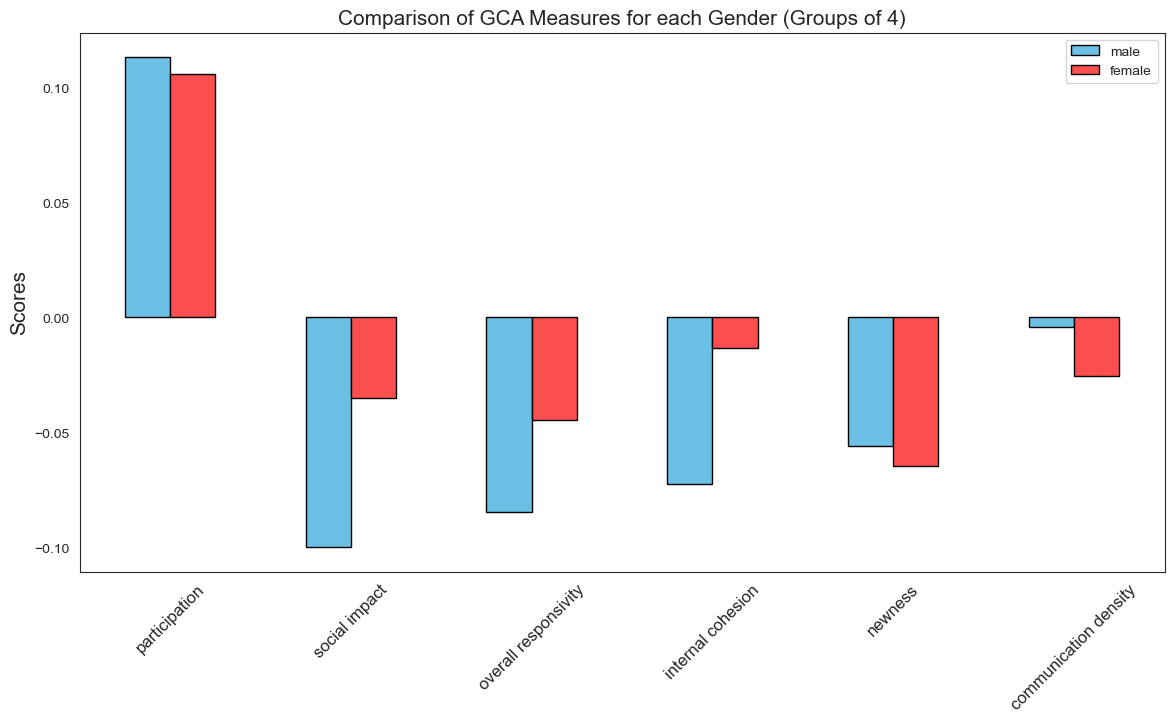

In [10]:
num = [1.0, 2.0]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
    y = df.loc[df['Sex'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "participation":z_par,
    "social impact":z_soc,
    "overall responsivity":z_overesp,
    "internal cohesion":z_internal,
    "newness":z_new,
    "communication density":z_dens

    }, 
    index=['male', 'female']
)

plotdata = plotdata + .15
plotdata = plotdata.transpose()

code = ['#6cc0e5', '#fb4f4f']
plotdata.plot(kind="bar", figsize=(14, 7), color = code, edgecolor = 'black')
plt.title("Comparison of GCA Measures for each Gender (Groups of 4)", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.savefig('/Users/jennytran/Documents/GitHub/smoc-project/outputs/gca_gender.png')

In [11]:
t_test_all = []
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.participation'], df_male['z.participation'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.social.impact'], df_male['z.social.impact'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.overall.responsivity'], df_male['z.overall.responsivity'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.internal.cohesion'], df_male['z.internal.cohesion'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.newness'], df_male['z.newness'])))
t_test_all.append(list(scipy.stats.ttest_ind(df_fem['z.comm.density'], df_male['z.comm.density'])))
df_ttest_all = pd.DataFrame(t_test_all, columns = ['f-statistic', 'p-value'])
df_ttest_all.insert(loc = 0, column = 'GCA dimensions', value = cols)
df_ttest_all

,GCA dimensions,f-statistic,p-value
0,participation,-3.600565,3.188532e-04
1,social impact,7.777027,8.053257e-15
2,overall responsivity,6.843426,8.122069e-12
3,internal cohesion,5.749766,9.162433e-09
4,newness,-4.508775,6.584290e-06
5,communication density,-6.693479,2.279831e-11


Social impact and internal cohesion has the most statistical significance when comparing males and females who are in groups of 4.

## Mean measure for female students

In [12]:
sex_lst = []
num_females = []
for n in df['chat_room_id']:
  a = df[df['chat_room_id'] == n]
  temp_sex = []
  for i in a['Sex']:
    temp_sex.append(i)
  sex_lst.append(temp_sex)
for n in sex_lst:
  num_females.append(n.count(2))
df['Number of Females'] = num_females

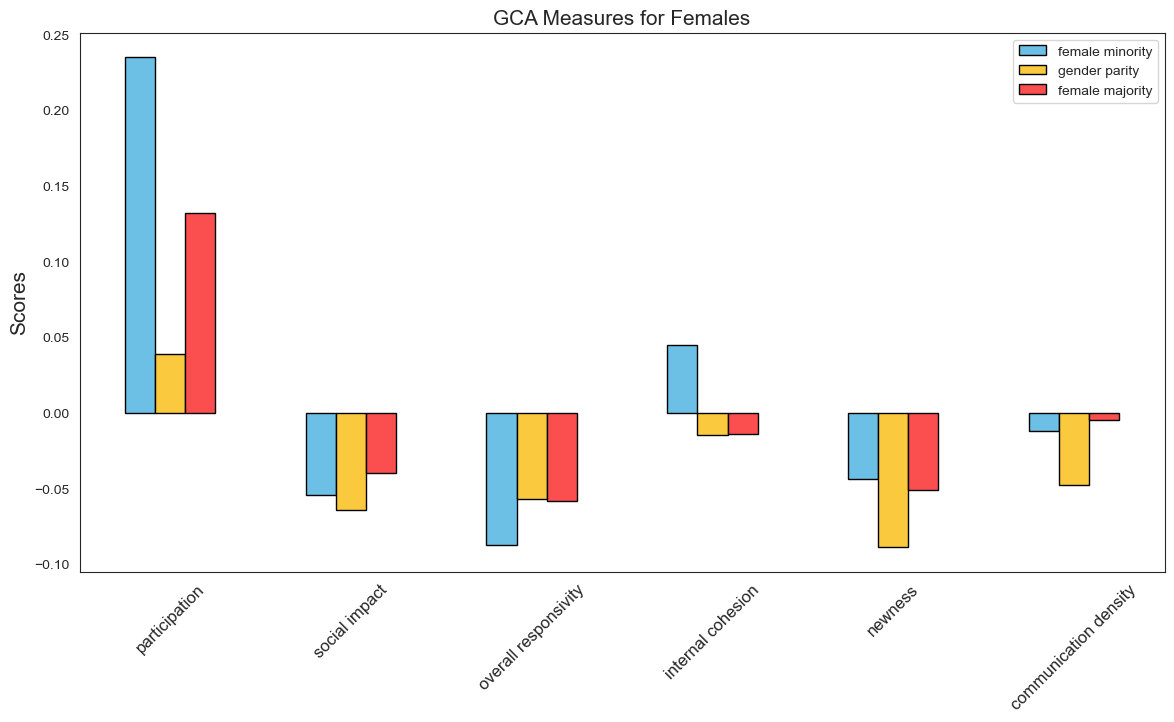

In [13]:
df_fem = df.loc[df['Sex']==2]
#df_fem.drop(df_fem.loc[df_fem['Number of Females']==0].index, inplace=True)
df_fem = df_fem.drop(df_fem.loc[df_fem['Number of Females']==4].index)
df_fem.reset_index(drop = True)

num = [1,2,3]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
    y = df_fem.loc[df_fem['Number of Females'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "participation":z_par,
    "social impact":z_soc,
    "overall responsivity":z_overesp,
    "internal cohesion":z_internal,
    "newness":z_new,
    "communication density":z_dens

    }, 
    index=['female minority', 'gender parity', 'female majority']
)

plotdata = plotdata + .15
plotdata = plotdata.transpose()

plotdata.plot(kind="bar", figsize=(14, 7), color = CB_color_cycle, edgecolor = 'black')
plt.title("GCA Measures for Females", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.savefig('/Users/jennytran/Documents/GitHub/smoc-project/outputs/gca_females.png')

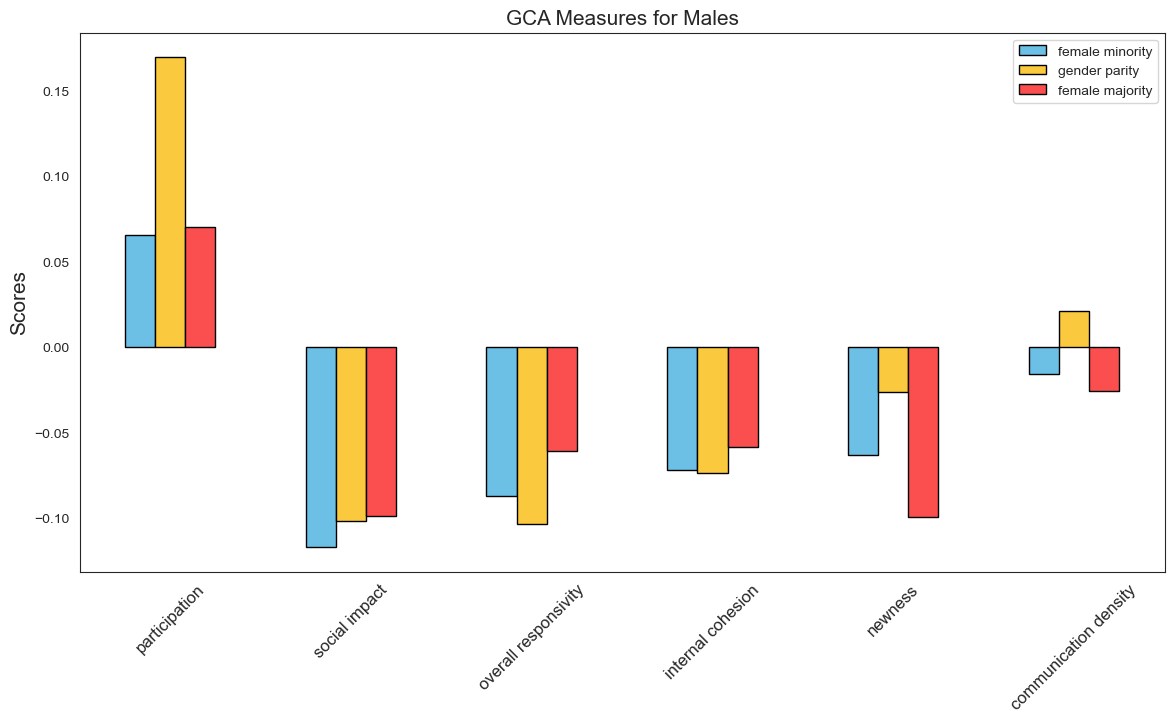

In [14]:
df_male = df.loc[df['Sex']==1]
df_male = df_male.drop(df_male.loc[df_male['Number of Females']==0].index)
df_male.reset_index(drop = True)

num = [1,2,3]
z_par = []
z_soc = []
z_overesp = []
z_internal = []
z_new = []
z_dens = []
for n in num:
    y = df_male.loc[df_male['Number of Females'] == n]
    z_par.append(sum(y['z.participation']) / len(y))
    z_soc.append(sum(y['z.social.impact']) / len(y))
    z_overesp.append(sum(y['z.overall.responsivity']) / len(y))
    z_internal.append(sum(y['z.internal.cohesion']) / len(y))
    z_new.append(sum(y['z.newness']) / len(y))
    z_dens.append(sum(y['z.comm.density']) / len(y))

plotdata = pd.DataFrame({
    "participation":z_par,
    "social impact":z_soc,
    "overall responsivity":z_overesp,
    "internal cohesion":z_internal,
    "newness":z_new,
    "communication density":z_dens

    }, 
    index=['female minority', 'gender parity', 'female majority']
)

plotdata = plotdata + .15
plotdata = plotdata.transpose()

plotdata.plot(kind="bar", figsize=(14, 7), color = CB_color_cycle, edgecolor = 'black')
plt.title("GCA Measures for Males", fontsize=15)
#plt.xlabel("Gender Compositions")
plt.ylabel("Scores", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.savefig('/Users/jennytran/Documents/GitHub/smoc-project/outputs/gca_males.png')

## T-Test for Female Minority Groups

In [15]:
df_fem_min = df_fem.loc[df_fem['Number of Females'] == 1]
df_male_min = df_male.loc[df_male['Number of Females'] == 1]

In [16]:
t_test_min = []
t_test_min.append(list(scipy.stats.ttest_ind(df_fem_min['z.participation'], df_male_min['z.participation'])))
t_test_min.append(list(scipy.stats.ttest_ind(df_fem_min['z.social.impact'], df_male_min['z.social.impact'])))
t_test_min.append(list(scipy.stats.ttest_ind(df_fem_min['z.overall.responsivity'], df_male_min['z.overall.responsivity'])))
t_test_min.append(list(scipy.stats.ttest_ind(df_fem_min['z.internal.cohesion'], df_male_min['z.internal.cohesion'])))
t_test_min.append(list(scipy.stats.ttest_ind(df_fem_min['z.newness'], df_male_min['z.newness'])))
t_test_min.append(list(scipy.stats.ttest_ind(df_fem_min['z.comm.density'], df_male_min['z.comm.density'])))
df_ttest_min = pd.DataFrame(t_test_min, columns = ['f-statistic', 'p-value'])
df_ttest_min.insert(loc = 0, column = 'GCA dimensions', value = cols)
df_ttest_min

,GCA dimensions,f-statistic,p-value
0,participation,2.451181,0.014629
1,social impact,1.112023,0.266738
2,overall responsivity,-0.008975,0.992843
3,internal cohesion,1.873266,0.061697
4,newness,0.631349,0.528142
5,communication density,0.135743,0.892087


Participation is statistically significant when comparing males and females in female minority groups.

## T-Test for Gender Parity Groups

In [17]:
df_fem_par = df_fem.loc[df_fem['Number of Females'] == 2]
df_male_par = df_male.loc[df_male['Number of Females'] == 2]

In [18]:
t_test_par = []
t_test_par.append(list(scipy.stats.ttest_ind(df_fem_par['z.participation'], df_male_par['z.participation'])))
t_test_par.append(list(scipy.stats.ttest_ind(df_fem_par['z.social.impact'], df_male_par['z.social.impact'])))
t_test_par.append(list(scipy.stats.ttest_ind(df_fem_par['z.overall.responsivity'], df_male_par['z.overall.responsivity'])))
t_test_par.append(list(scipy.stats.ttest_ind(df_fem_par['z.internal.cohesion'], df_male_par['z.internal.cohesion'])))
t_test_par.append(list(scipy.stats.ttest_ind(df_fem_par['z.newness'], df_male_par['z.newness'])))
t_test_par.append(list(scipy.stats.ttest_ind(df_fem_par['z.comm.density'], df_male_par['z.comm.density'])))
df_ttest_par = pd.DataFrame(t_test_par, columns = ['f-statistic', 'p-value'])
df_ttest_par.insert(loc = 0, column = 'GCA dimensions', value = cols)
df_ttest_par

,GCA dimensions,f-statistic,p-value
0,participation,-3.193222,0.001452
1,social impact,1.184678,0.236432
2,overall responsivity,1.585832,0.113101
3,internal cohesion,1.612726,0.107127
4,newness,-3.410117,0.000676
5,communication density,-3.703460,0.000225


Particitipation, newness, and communication density are statistically significant when comparing males and females in gender parity groups.

## T-Test for Female Majority Groups

In [19]:
df_fem_maj = df_fem.loc[df_fem['Number of Females'] == 3]
df_male_maj = df_male.loc[df_male['Number of Females'] == 3]

In [20]:
t_test_maj = []
t_test_maj.append(list(scipy.stats.ttest_ind(df_fem_maj['z.participation'], df_male_maj['z.participation'])))
t_test_maj.append(list(scipy.stats.ttest_ind(df_fem_maj['z.social.impact'], df_male_maj['z.social.impact'])))
t_test_maj.append(list(scipy.stats.ttest_ind(df_fem_maj['z.overall.responsivity'], df_male_maj['z.overall.responsivity'])))
t_test_maj.append(list(scipy.stats.ttest_ind(df_fem_maj['z.internal.cohesion'], df_male_maj['z.internal.cohesion'])))
t_test_maj.append(list(scipy.stats.ttest_ind(df_fem_maj['z.newness'], df_male_maj['z.newness'])))
t_test_maj.append(list(scipy.stats.ttest_ind(df_fem_maj['z.comm.density'], df_male_maj['z.comm.density'])))
df_ttest_maj = pd.DataFrame(t_test_maj, columns = ['f-statistic', 'p-value'])
df_ttest_maj.insert(loc = 0, column = 'GCA dimensions', value = cols)
df_ttest_maj

,GCA dimensions,f-statistic,p-value
0,participation,1.411777,0.158293
1,social impact,1.689480,0.091405
2,overall responsivity,0.078692,0.937291
3,internal cohesion,1.159664,0.246432
4,newness,2.490089,0.012915
5,communication density,1.074130,0.282995


Newness is statistically significant when comparing males and females in female majority groups.